In [1]:
import os
import pandas as pd
import requests
PATH = r'E:/Python Projects/Python_ML/'
r=requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
with open(PATH + 'iris.data', 'w') as f:
    f.write(r.text)
os.chdir(PATH)
df = pd.read_csv(PATH + 'iris.data', names=['sepal length', 'sepal width',
'petal length', 'petal width', 'class'])
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Text(0.5,1.01,'Iris Petal Width')

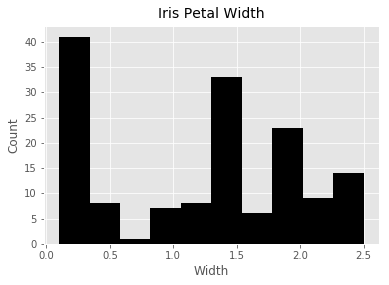

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import numpy as np
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(df['petal width'], color='black');
ax.set_ylabel('Count', fontsize=12)
ax.set_xlabel('Width', fontsize=12)
plt.title('Iris Petal Width', fontsize=14, y=1.01)

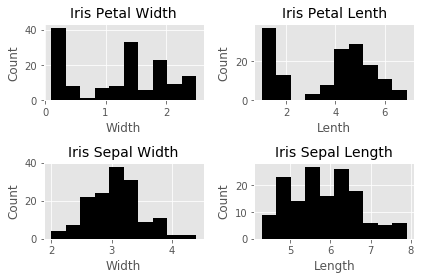

In [3]:
fig, ax = plt.subplots(2,2, figsize=(6,4))
ax[0][0].hist(df['petal width'], color='black');
ax[0][0].set_ylabel('Count', fontsize=12)
ax[0][0].set_xlabel('Width', fontsize=12)
ax[0][0].set_title('Iris Petal Width', fontsize=14, y=1.01)
ax[0][1].hist(df['petal length'], color='black');
ax[0][1].set_ylabel('Count', fontsize=12)
ax[0][1].set_xlabel('Lenth', fontsize=12)
ax[0][1].set_title('Iris Petal Lenth', fontsize=14, y=1.01)
ax[1][0].hist(df['sepal width'], color='black');
ax[1][0].set_ylabel('Count', fontsize=12)
ax[1][0].set_xlabel('Width', fontsize=12)
ax[1][0].set_title('Iris Sepal Width', fontsize=14, y=1.01)
ax[1][1].hist(df['sepal length'], color='black');
ax[1][1].set_ylabel('Count', fontsize=12)
ax[1][1].set_xlabel('Length', fontsize=12)
ax[1][1].set_title('Iris Sepal Length', fontsize=14, y=1.01)
plt.tight_layout()

Text(0.5,1,'Petal Scatterplot')

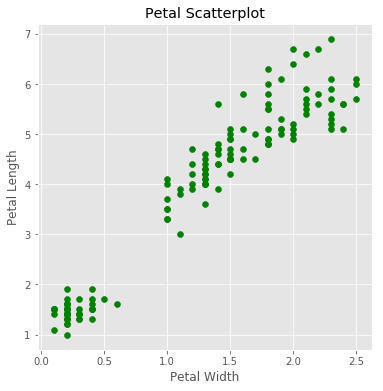

In [4]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(df['petal width'],df['petal length'], color='green')
ax.set_xlabel('Petal Width')
ax.set_ylabel('Petal Length')
ax.set_title('Petal Scatterplot')

Text(0.5,1,'Petal Length Plot')

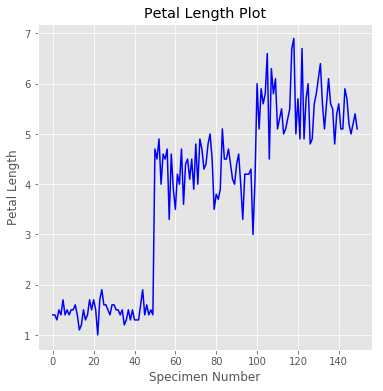

In [5]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(df['petal length'], color='blue')
ax.set_xlabel('Specimen Number')
ax.set_ylabel('Petal Length')
ax.set_title('Petal Length Plot')

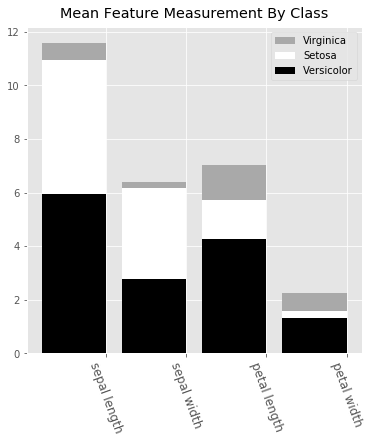

In [6]:
fig, ax = plt.subplots(figsize=(6,6))
bar_width = .8
labels = [x for x in df.columns if 'length' in x or 'width' in x]
ver_y = [df[df['class']=='Iris-versicolor'][x].mean() for x in labels]
vir_y = [df[df['class']=='Iris-virginica'][x].mean() for x in labels]
set_y = [df[df['class']=='Iris-setosa'][x].mean() for x in labels]
x = np.arange(len(labels))
ax.bar(x, vir_y, bar_width, bottom=set_y, color='darkgrey')
ax.bar(x, set_y, bar_width, bottom=ver_y, color='white')
ax.bar(x, ver_y, bar_width, color='black')
ax.set_xticks(x + (bar_width/2))
ax.set_xticklabels(labels, rotation=-70, fontsize=12);
ax.set_title('Mean Feature Measurement By Class', y=1.01)
ax.legend(['Virginica','Setosa','Versicolor'])

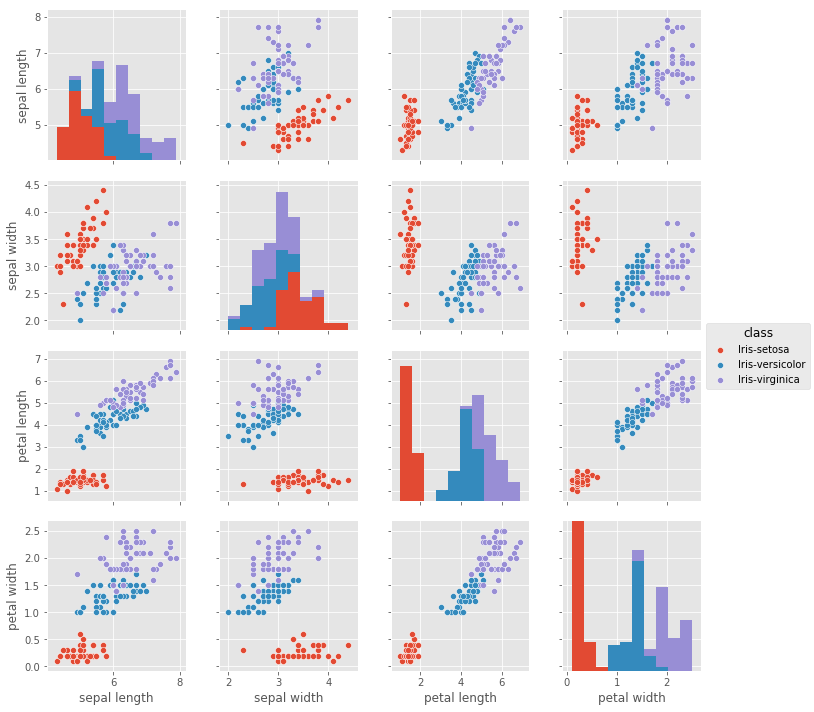

In [7]:
import seaborn as sns
sns.pairplot(df, hue="class")

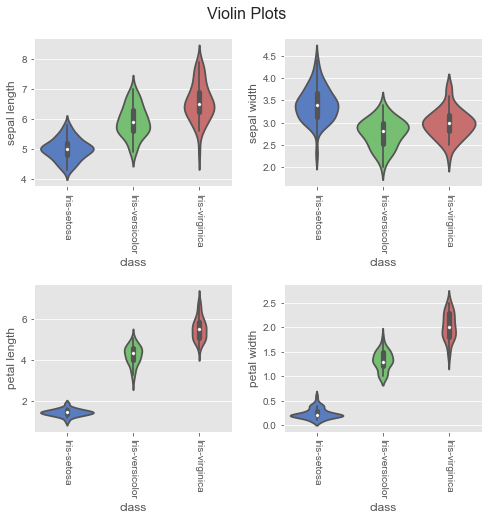

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(7, 7))
sns.set(style='white', palette='muted')
sns.violinplot(x=df['class'], y=df['sepal length'], ax=ax[0,0])
sns.violinplot(x=df['class'], y=df['sepal width'], ax=ax[0,1])
sns.violinplot(x=df['class'], y=df['petal length'], ax=ax[1,0])
sns.violinplot(x=df['class'], y=df['petal width'], ax=ax[1,1])
fig.suptitle('Violin Plots', fontsize=16, y=1.03)
for i in ax.flat:
    plt.setp(i.get_xticklabels(), rotation=-90)
fig.tight_layout()

In [9]:
#df['class'] = df['class'].map({'Iris-setosa':'SET','Iris-virginica':'VIR','Iris-versicolor':'VER'})
#df.head()

In [10]:
df['wide petal'] = df['petal width'].apply(lambda v: 1 if v >=1.3 else 0)
df.head()

,sepal length,sepal width,petal length,petal width,class,wide petal
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [11]:
df['petal area'] = df.apply(lambda r:r['petal length']*r['petal width'],axis=1)
df.head()

,sepal length,sepal width,petal length,petal width,class,wide petal,petal area
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,0,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,0,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,0,0.28


In [12]:
df_float2log = df.applymap(lambda v: np.log(v) if isinstance(v,float) else v)
df_float2log.head()

,sepal length,sepal width,petal length,petal width,class,wide petal,petal area
0,1.629241,1.252763,0.336472,-1.609438,Iris-setosa,0,-1.272966
1,1.589235,1.098612,0.336472,-1.609438,Iris-setosa,0,-1.272966
2,1.547563,1.163151,0.262364,-1.609438,Iris-setosa,0,-1.347074
3,1.526056,1.131402,0.405465,-1.609438,Iris-setosa,0,-1.203973
4,1.609438,1.280934,0.336472,-1.609438,Iris-setosa,0,-1.272966


In [13]:
df.groupby('class').mean()

,sepal length,sepal width,petal length,petal width,wide petal,petal area
class,,,,,,
Iris-setosa,5.006,3.418,1.464,0.244,0.0,0.3628
Iris-versicolor,5.936,2.770,4.260,1.326,0.7,5.7204
Iris-virginica,6.588,2.974,5.552,2.026,1.0,11.2962


In [14]:
df.groupby('class').describe()

petal area                                                  \
                     count     mean       std   min     25%     50%    75%   
class                                                                        
Iris-setosa           50.0   0.3628  0.183248  0.11  0.2650   0.300   0.42   
Iris-versicolor       50.0   5.7204  1.368403  3.30  4.8600   5.615   6.75   
Iris-virginica        50.0  11.2962  2.157412  7.50  9.7175  11.445  12.79   

                       petal length        ...  sepal width      wide petal  \
                   max        count   mean ...          75%  max      count   
class                                      ...                                
Iris-setosa       0.96         50.0  1.464 ...        3.675  4.4       50.0   
Iris-versicolor   8.64         50.0  4.260 ...        3.000  3.4       50.0   
Iris-virginica   15.87         50.0  5.552 ...        3.175  3.8       50.0   

                                                        
                mean      std  min  25%  50%  75%  max  
class                                                   
Iris-setosa      0.0  0.00000  0.0  0.0  0.0  0.0  0.0  
Iris-versicolor  0.7  0.46291  0.0  0.0  1.0  1.0  1.0  
Iris-virginica   1.0  0.00000  1.0  1.0  1.0  1.0  1.0  

[3 rows x 48 columns]

In [15]:
df.groupby('petal width')['class'].unique().to_frame()

,class
petal width,
0.1,[Iris-setosa]
0.2,[Iris-setosa]
0.3,[Iris-setosa]
0.4,[Iris-setosa]
0.5,[Iris-setosa]
0.6,[Iris-setosa]
1.0,[Iris-versicolor]
1.1,[Iris-versicolor]
1.2,[Iris-versicolor]


In [16]:
df.groupby('class')['petal width']\
.agg({'delta': lambda x: x.max() - x.min(),'max':np.max,'min':np.min})

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,delta,max,min
class,,,
Iris-setosa,0.5,0.6,0.1
Iris-versicolor,0.8,1.8,1.0
Iris-virginica,1.1,2.5,1.4


Text(0.5,1.02,'Setosa Sepal Width vs. Sepal Length')

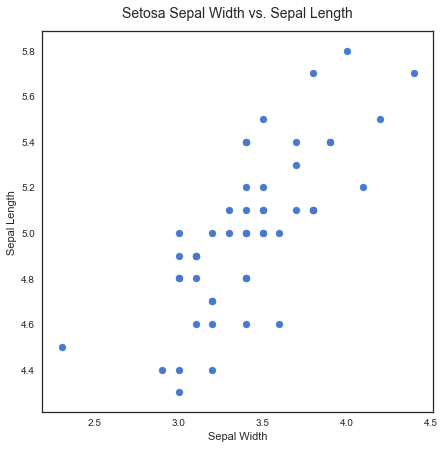

In [17]:
fig,ax = plt.subplots(figsize=(7,7))
ax.scatter(df['sepal width'][:50],df['sepal length'][:50])
ax.set_ylabel('Sepal Length')
ax.set_xlabel('Sepal Width')
ax.set_title('Setosa Sepal Width vs. Sepal Length',fontsize=14,y=1.02)

E:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:           sepal length   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     60.52
Date:                Tue, 26 Jun 2018   Prob (F-statistic):           4.75e-10
Time:                        23:07:43   Log-Likelihood:                 2.0879
No. Observations:                  50   AIC:                           -0.1759
Df Residuals:                      48   BIC:                             3.648
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.6447      0.305      8.660      

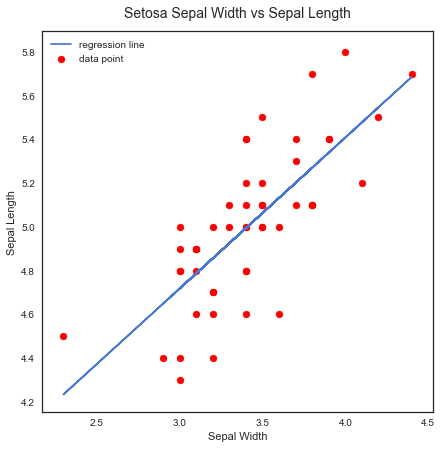

In [18]:
import statsmodels.api as sm
y = df['sepal length'][:50]
x = df['sepal width'][:50]
X = sm.add_constant(x)#为了使用OLS模型，线性回归增加常数项 y=kx+b

results = sm.OLS(y,X).fit()
print(results.summary())

fig,ax = plt.subplots(figsize=(7,7))
ax.plot(x,results.fittedvalues,label='regression line')
ax.scatter(x,y,label='data point',color='r')
ax.set_ylabel('Sepal Length')
ax.set_xlabel('Sepal Width')
ax.set_title('Setosa Sepal Width vs Sepal Length',fontsize=14,y=1.02)
ax.legend(loc=2)


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

clf = RandomForestClassifier(max_depth=5,n_estimators=10)

X = df.iloc[:,:4] #.ix已经被弃用，根据整数值切片
y = df.iloc[:,4]
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=.3)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

rf = pd.DataFrame(list(zip(y_pred,y_test)),columns=['predicted','actual'])
rf['correct'] = rf.apply(lambda r: 1 if r['predicted'] == r['actual'] else 0,axis=1)
rf.head()


E:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,predicted,actual,correct
0,Iris-virginica,Iris-virginica,1
1,Iris-setosa,Iris-setosa,1
2,Iris-versicolor,Iris-versicolor,1
3,Iris-setosa,Iris-setosa,1
4,Iris-virginica,Iris-virginica,1


In [20]:
rf['correct'].sum() / rf['correct'].count()

0.9555555555555556

([<matplotlib.axis.XTick at 0xf396748>,
 <a list of 4 Text xticklabel objects>)

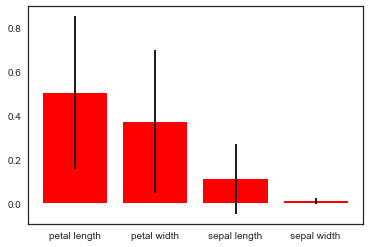

In [30]:
f_importances = clf.feature_importances_ #每个特征的重要性，列表形式
f_names = df.columns[:4] #获取每列的列名，列表形式
f_std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
zz = zip(f_importances,f_names,f_std)
zzs = sorted(zz,key=lambda x: x[0],reverse=True) #以特征重要性为keys，从大到小排序
imps = [x[0] for x in zzs]
labels = [x[1] for x in zzs]
errs = [x[2] for x in zzs]
plt.bar(range(len(f_importances)),imps,color='r',yerr=errs,align="center")
plt.xticks(range(len(f_importances)),labels)


In [37]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split

clf = OneVsRestClassifier(SVC(kernel='linear'))

X = df.iloc[:,:4]
y = np.array(df.iloc[:,4]).astype(str)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

rf = pd.DataFrame(list(zip(y_pred,y_test)),columns=['predicted','actual'])

rf['correct'] = rf.apply(lambda r: 1 if r['predicted'] == r['actual'] else 0,axis=1)
rf.head()


,predicted,actual,correct
0,Iris-setosa,Iris-setosa,1
1,Iris-versicolor,Iris-versicolor,1
2,Iris-virginica,Iris-virginica,1
3,Iris-versicolor,Iris-versicolor,1
4,Iris-setosa,Iris-setosa,1


In [38]:
rf['correct'].sum() / rf['correct'].count()

0.9111111111111111